In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from tensorflow.keras.layers import Dense, GRU, Dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import InputLayer
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression


In [4]:
xlsxFile = 'human_data_mining.xlsx'
sheetList = []

# openpyxl를 이용하여 시트명 가져오기

wb = openpyxl.load_workbook(xlsxFile)
for i in wb.sheetnames:
    sheetList.append(i)
    
print(sheetList)


# pandas를 이용하여 각 시트별 데이터 가져오기
xlsx = pd.ExcelFile(xlsxFile)
df1 = pd.read_excel(xlsx, '가격예측(조던1레트로하이OG블랙모카)(2)')
df2 = pd.read_excel(xlsx, '가격예측(나이키 x 사카이 LD와플 블루 멀티)(2)')
#df3 = pd.read_excel(xlsx, '가격예측(나이키 x 피스마이너스원에어포스1로우파라노이드)')
df1['날짜'] = pd.to_datetime(df1['날짜'], format='%Y%m%d')
df1['종가'] = df1['종가'].interpolate()
df2['날짜'] = pd.to_datetime(df2['날짜'], format='%Y%m%d')
df2['종가'] = df2['종가'].interpolate()
#df3['날짜'] = pd.to_datetime(df3['날짜'], format='%Y%m%d')
#df3['종가'] = df3['종가'].interpolate()
df1['가격변동량'] = (df1["가격"] - df1['가격'].shift(1))
df1['가격변동량'][0] = 0
df2['가격변동량'] = (df2["가격"] - df2['가격'].shift(1))
df2['가격변동량'][0] = 0
#df3['가격변동량'] = (df3["가격"] - df3['가격'].shift(1))
#df3['가격변동량'][0] = 0

['리셀가능여부', '가격예측(조던1레트로하이OG블랙모카)', '가격예측(나이키 x 사카이 LD와플 블루 멀티)', '가격예측(나이키 x 피스마이너스원에어포스1로우파라노이드)', '가격예측(나이키 x 사카이 LD와플 블루 멀티)(2)', '가격예측(조던1레트로하이OG블랙모카)(2)']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
df1.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['가격','가격변동량','종가','검색량','평균기온','소비자물가데이터']
stocks_scaled1 = scaler.fit_transform(df1[scale_cols])
stocks_scaled1 = pd.DataFrame(stocks_scaled1)
stocks_scaled1.columns = scale_cols

stocks_scaled1

,가격,가격변동량,종가,검색량,평균기온,소비자물가데이터
0,0.201452,0.449612,0.155486,0.225093,0.581545,0.0
1,0.219601,0.527132,0.165667,0.064312,0.587983,0.0
2,0.132486,0.077519,0.175847,0.014068,0.557940,0.0
3,0.094374,0.286822,0.186028,0.033879,0.585837,0.0
4,0.085299,0.410853,0.221074,0.025265,0.660944,0.0
...,...,...,...,...,...,...
499,0.729583,0.534884,0.284879,0.022394,0.493562,1.0
500,0.735027,0.472868,0.291127,0.025265,0.495708,1.0
501,0.713249,0.356589,0.364247,0.026414,0.527897,1.0
502,0.693285,0.364341,0.354115,0.024404,0.551502,1.0


In [6]:
df2.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['가격','가격변동량','종가','검색량','평균기온','소비자물가데이터']
stocks_scaled2 = scaler.fit_transform(df2[scale_cols])
stocks_scaled2 = pd.DataFrame(stocks_scaled2)
stocks_scaled2.columns = scale_cols

stocks_scaled2

,가격,가격변동량,종가,검색량,평균기온,소비자물가데이터
0,0.364754,0.533333,0.332840,0.00000,0.231760,0.255814
1,0.364754,0.533333,0.336763,0.00000,0.341202,0.255814
2,0.364754,0.533333,0.337360,0.00000,0.418455,0.255814
3,0.364754,0.533333,0.317914,0.00000,0.463519,0.255814
4,0.364754,0.533333,0.305576,0.00000,0.405579,0.255814
...,...,...,...,...,...,...
768,0.692623,0.533333,0.631803,0.00000,0.493562,1.000000
769,0.692623,0.533333,0.635020,0.03125,0.495708,1.000000
770,0.692623,0.533333,0.672667,0.00000,0.527897,1.000000
771,0.692623,0.533333,0.667451,0.00000,0.551502,1.000000


In [7]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)
def adj_r2_score(y_true, y_pred, p=6):
    return 1-(1-r2_score(y_true, y_pred)) * (len(y_true)-1) / (len(y_true) - p - 1)

def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true-y_pred))
def MSE(y_true, y_pred):
    return np.mean(np.square(y_true-y_pred))
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [8]:
TEST_SIZE = int(len(stocks_scaled1)*0.2)
WINDOW_SIZE = 5
print(TEST_SIZE)
train_1 = stocks_scaled1[:-TEST_SIZE]
test_1 = stocks_scaled1[-TEST_SIZE:]

100


In [9]:
TEST_SIZE = int(len(stocks_scaled2)*0.2)
WINDOW_SIZE = 5
print(TEST_SIZE)
train_2 = stocks_scaled2[:-TEST_SIZE]
test_2 = stocks_scaled2[-TEST_SIZE:]

154


In [35]:
feature_cols = ['가격','가격변동량','검색량', '종가']
label_cols = ['가격']
train_feature_1 = train_1[feature_cols]
train_label_1 = train_1[label_cols]
      
train_feature_1, train_label_1 = make_dataset(train_feature_1, train_label_1, 15)
x_train_1, x_valid_1, y_train_1, y_valid_1 = train_test_split(train_feature_1, train_label_1, test_size=0.2)
      
test_feature_1 = test_1[feature_cols]
test_label_1 = test_1[label_cols]

test_feature_1, test_label_1 = make_dataset(test_feature_1, test_label_1, 15)

In [29]:
feature_cols_price = ['가격']
label_cols = ['가격']
train_feature_1price = train_1[feature_cols_price]
train_label_1price = train_1[label_cols]
      
train_feature_1price, train_label_1price = make_dataset(train_feature_1price, train_label_1price, 15)
x_train_1price, x_valid_1price, y_train_1price, y_valid_1price = train_test_split(train_feature_1price, train_label_1price, test_size=0.2)
      
test_feature_1price = test_1[feature_cols_price]
test_label_1price = test_1[label_cols]

test_feature_1price, test_label_1price = make_dataset(test_feature_1price, test_label_1price, 15)

In [36]:
model = Sequential()
model.add(InputLayer(input_shape = x_train_1[0].shape))
model.add(GRU(units=512, activation = 'tanh'))
#model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=100, batch_size=16)
final_model_1 = AdaBoostRegressor(GRU_Predictors, n_estimators=30, random_state=42)

final_model_1.fit(train_feature_1, train_label_1)

preds_1= final_model_1.predict(test_feature_1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
25/25 [==============================] - 0s 6ms/step - loss: 2.3236e-04
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 2.3429e-04
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 2.3683e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 1.8641e-04
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 2.2624e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 1.7989e-04
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 1.7932e-04
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 1.3897e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 1.1595e-04
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 1.5098e-04
Epoch 11/100
25/25 [==============================] - 0s 5ms/step - loss: 1.5670e-04
Epoch 12/100
25/25 [==============================

1번 신발 전체 mse :  0.005216336103769654
1번 신발 전체 mae :  0.056761652507808576
1번 신발 전체 RMSE :  0.035581486007546445
1번 신발 전체 R2 :  0.6620337887763635
1번 신발 전체 adj_r2 : 0.6360363879130069
1번 신발 전체 MedAE :  0.023253824771424125


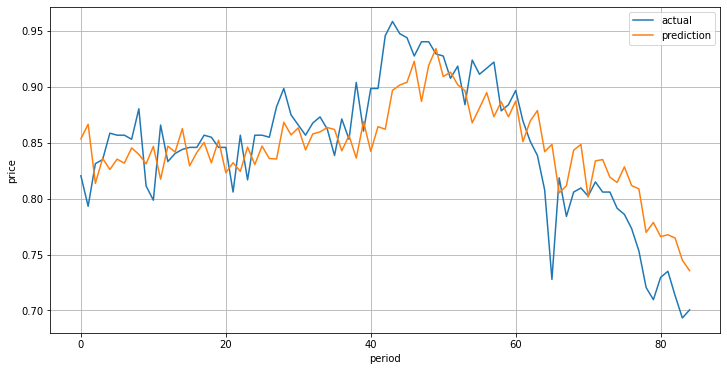

In [37]:
mse_1 = MSE(test_label_1, preds_1)
print("1번 신발 전체 mse : ", mse_1)

mae_1 = MAE(test_label_1, preds_1)
print("1번 신발 전체 mae : ", mae_1)

RMSE_1 = np.sqrt(mean_squared_error(test_label_1, preds_1))
print('1번 신발 전체 RMSE : ', RMSE_1)

r2_y_predict_1 = r2_score(test_label_1, preds_1)
print('1번 신발 전체 R2 : ', r2_y_predict_1)
      
adj_r2_1 = adj_r2_score(test_label_1, preds_1)
print("1번 신발 전체 adj_r2 :", adj_r2_1)

MedAE_y_predict_1 = median_absolute_error(test_label_1, preds_1)
print('1번 신발 전체 MedAE : ', MedAE_y_predict_1)

plt.figure(figsize=(12,6))
plt.ylabel('price')
plt.xlabel('period')
plt.plot(test_label_1,label='actual')
plt.plot(preds_1,label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape = x_train_1price[0].shape))
model.add(GRU(units=512))
#model.add(Dropout(0.5))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=100, batch_size=16)
final_model_1price = AdaBoostRegressor(GRU_Predictors, n_estimators=30, random_state=42)

final_model_1price.fit(train_feature_1price, train_label_1price)

preds_1price = final_model_1price.predict(test_feature_1price)

1번 신발 가격  mse :  0.006970951758089631
1번 신발 가격 mae :  0.06544315803315931
1번 신발 가격 RMSE :  0.033548345365006886
1번 신발 가격 R2 :  0.6995533748976266
1번 신발 가격 adj_r2 : 0.6764420960435978
1번 신발 가격 MedAE :  0.017757339183302023


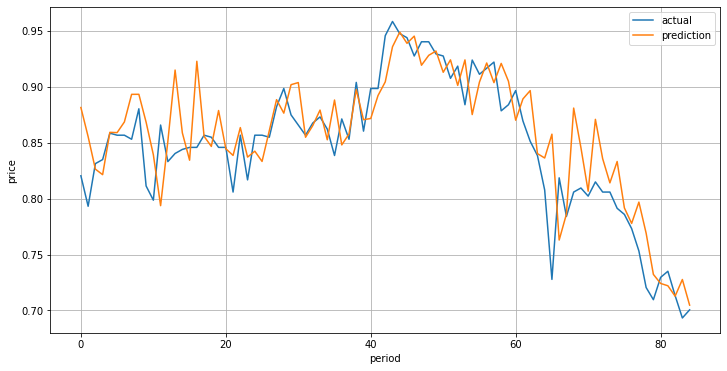

In [14]:
mse_1price = MSE(test_label_1price, preds_1price)
print("1번 신발 가격  mse : ", mse_1price)

mae_1price = MAE(test_label_1price, preds_1price)
print("1번 신발 가격 mae : ", mae_1price)

RMSE_1price = np.sqrt(mean_squared_error(test_label_1price, preds_1price))
print('1번 신발 가격 RMSE : ', RMSE_1price)

r2_y_predict_1price = r2_score(test_label_1price, preds_1price)
print('1번 신발 가격 R2 : ', r2_y_predict_1price)
      
adj_r2_1price = adj_r2_score(test_label_1price, preds_1price)
print("1번 신발 가격 adj_r2 :", adj_r2_1price)

MedAE_y_predict_1price = median_absolute_error(test_label_1price, preds_1price)
print('1번 신발 가격 MedAE : ', MedAE_y_predict_1price)

plt.figure(figsize=(12,6))
plt.ylabel('price')
plt.xlabel('period')
plt.plot(test_label_1price,label='actual')
plt.plot(preds_1price,label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [38]:
feature_cols = ['가격','가격변동량','소비자물가데이터']
label_cols = ['가격']
train_feature_2 = train_2[feature_cols]
train_label_2 = train_2[label_cols]
      
train_feature_2, train_label_2 = make_dataset(train_feature_2, train_label_2, 15)
x_train_2, x_valid_2, y_train_2, y_valid_2 = train_test_split(train_feature_2, train_label_2, test_size=0.2)
      
test_feature_2 = test_2[feature_cols]
test_label_2 = test_2[label_cols]

test_feature_2, test_label_2 = make_dataset(test_feature_2, test_label_2, 15)

In [25]:
feature_cols_price = ['가격']
label_cols = ['가격']
train_feature_2price = train_2[feature_cols_price]
train_label_2price = train_2[label_cols]
      
train_feature_2price, train_label_2price = make_dataset(train_feature_2price, train_label_2price, 15)
x_train_2price, x_valid_2price, y_train_2price, y_valid_2price = train_test_split(train_feature_2price, train_label_2price, test_size=0.2)
      
test_feature_2price = test_2[feature_cols_price]
test_label_2price = test_2[label_cols]

test_feature_2price, test_label_2price = make_dataset(test_feature_2price, test_label_2price, 15)

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape = x_train_2[0].shape))
model.add(GRU(units=512, activation = 'tanh'))
#model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss',patience=5)

GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=100, batch_size=16)
final_model_2 = AdaBoostRegressor(GRU_Predictors, n_estimators=30, random_state=42)

final_model_2.fit(train_feature_2, train_label_2)

preds_2= final_model_2.predict(test_feature_2)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
38/38 [==============================] - 0s 5ms/step - loss: 1.1952e-05
Epoch 98/100
38/38 [==============================] - 0s 5ms/step - loss: 9.9433e-06
Epoch 99/100
38/38 [==============================] - 0s 5ms/step - loss: 8.2534e-06
Epoch 100/100
38/38 [==============================] - 0s 5ms/step - loss: 1.2050e-05
Epoch 1/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 8.7833e-04
Epoch 5/100
38/38 [==============================] - 0s 5ms/step - loss: 2.7661e-04
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 1.7223e-04
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 9.4800e-05
Epoch 8/100
38/38 [==============================] - 0s 5ms/

In [ ]:
mse_2 = MSE(test_label_2, preds_2)
print("2번 신발 전체 mse : ", mse_2)

mae_2 = MAE(test_label_2, preds_2)
print("2번 신발 전체 mae : ", mae_2)

RMSE_2 = np.sqrt(mean_squared_error(test_label_2, preds_2))
print('2번 신발 전체 RMSE : ', RMSE_2)

r2_y_predict_2 = r2_score(test_label_2, preds_2)
print('2번 신발 전체 R2 : ', r2_y_predict_2)
      
adj_r2_2 = adj_r2_score(test_label_2, preds_2)
print("2번 신발 전체 adj_r2 :", adj_r2_2)

MedAE_y_predict_2 = median_absolute_error(test_label_2, preds_2)
print('2번 신발 전체 MedAE : ', MedAE_y_predict_2)

plt.figure(figsize=(12,6))
plt.ylabel('price')
plt.xlabel('period')
plt.plot(test_label_2,label='actual')
plt.plot(preds_2,label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [19]:
model = Sequential()
model.add(InputLayer(input_shape = x_train_2price[0].shape))
model.add(GRU(units=512))
#model.add(Dropout(0.5))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=100, batch_size=16)
final_model_2price = AdaBoostRegressor(GRU_Predictors, n_estimators=30, random_state=42)

final_model_2price.fit(train_feature_2price, train_label_2price)

preds_2price = final_model_2price.predict(test_feature_2price)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
38/38 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 9.7511e-04
Epoch 5/100
38/38 [==============================] - 0s 5ms/step - loss: 5.8506e-04
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 4.2468e-04
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 3.3176e-04
Epoch 8/100
38/38 [==============================] - 0s 5ms/step - loss: 5.3989e-04
Epoch 9/100
38/38 [==============================] - 0s 5ms/step - loss: 3.7664e-04
Epoch 10/100
38/38 [==============================] - 0s 5ms/step - loss: 3.1819e-04
Epoch 11/100
38/38 [==============================] - 0s 5ms/step - loss: 2.8922e-04
Epoch 12/100
38/38 [==============================] - 0s 5ms/s

2번 신발 가격  mse :  0.07414300222572749
2번 신발 가격 mae :  0.21484129435985244
2번 신발 가격 RMSE :  0.08360279587193607
2번 신발 가격 R2 :  0.8268371160092092
2번 신발 가격 adj_r2 : 0.8189660758278096
2번 신발 가격 MedAE :  0.023713835927306803


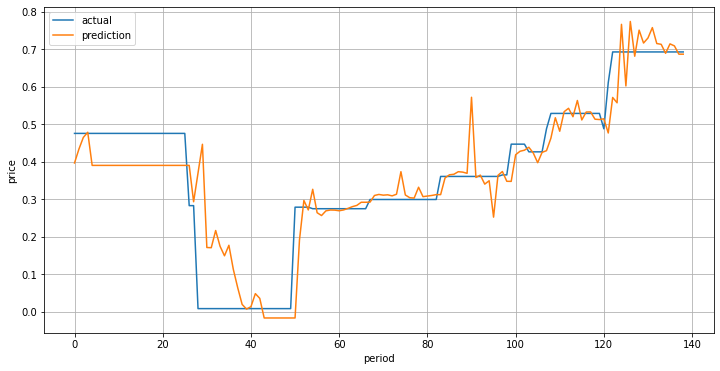

In [20]:
mse_2price = MSE(test_label_2price, preds_2price)
print("2번 신발 가격  mse : ", mse_2price)

mae_2price = MAE(test_label_2price, preds_2price)
print("2번 신발 가격 mae : ", mae_2price)

RMSE_2price = np.sqrt(mean_squared_error(test_label_2price, preds_2price))
print('2번 신발 가격 RMSE : ', RMSE_2price)

r2_y_predict_2price = r2_score(test_label_2price, preds_2price)
print('2번 신발 가격 R2 : ', r2_y_predict_2price)
      
adj_r2_2price = adj_r2_score(test_label_2price, preds_2price)
print("2번 신발 가격 adj_r2 :", adj_r2_2price)

MedAE_y_predict_2price = median_absolute_error(test_label_2price, preds_2price)
print('2번 신발 가격 MedAE : ', MedAE_y_predict_2price)

plt.figure(figsize=(12,6))
plt.ylabel('price')
plt.xlabel('period')
plt.plot(test_label_2price,label='actual')
plt.plot(preds_2price,label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [32]:
model = Sequential()
model.add(InputLayer(input_shape = x_train_1[0].shape))
model.add(GRU(units=512, activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=100, batch_size=16)
final_model_1 = AdaBoostRegressor(GRU_Predictors, n_estimators=30, random_state=42)

final_model_1.fit(train_feature_1, train_label_1)

preds_1= final_model_1.predict(test_feature_1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
25/25 [==============================] - 1s 35ms/step - loss: 3.0373e-04
Epoch 2/100
25/25 [==============================] - 1s 36ms/step - loss: 2.9671e-04
Epoch 3/100
25/25 [==============================] - 1s 36ms/step - loss: 2.2784e-04
Epoch 4/100
25/25 [==============================] - 1s 35ms/step - loss: 1.4964e-04
Epoch 5/100
25/25 [==============================] - 1s 35ms/step - loss: 1.9067e-04
Epoch 6/100
25/25 [==============================] - 1s 35ms/step - loss: 2.1673e-04
Epoch 7/100
25/25 [==============================] - 1s 36ms/step - loss: 1.8991e-04
Epoch 8/100
25/25 [==============================] - 1s 36ms/step - loss: 1.0584e-04
Epoch 9/100
25/25 [==============================] - 1s 35ms/step - loss: 1.0292e-04
Epoch 10/100
25/25 [==============================] - 1s 35ms/step - loss: 9.8312e-05
Epoch 11/100
25/25 [==============================] - 1s 35ms/step - loss: 8.4189e-05
Epoch 12/100
25/25 [===================

1번 신발 전체 mse :  0.006995385251736116
1번 신발 전체 mae :  0.06627150017440553
1번 신발 전체 RMSE :  0.03312262406990788
1번 신발 전체 R2 :  0.7071302000312698
1번 신발 전체 adj_r2 : 0.684601753879829
1번 신발 전체 MedAE :  0.019421532019945675


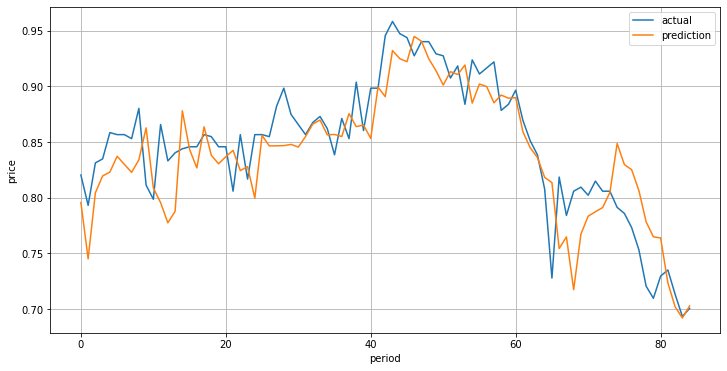

In [33]:
mse_1 = MSE(test_label_1, preds_1)
print("1번 신발 전체 mse : ", mse_1)

mae_1 = MAE(test_label_1, preds_1)
print("1번 신발 전체 mae : ", mae_1)

RMSE_1 = np.sqrt(mean_squared_error(test_label_1, preds_1))
print('1번 신발 전체 RMSE : ', RMSE_1)

r2_y_predict_1 = r2_score(test_label_1, preds_1)
print('1번 신발 전체 R2 : ', r2_y_predict_1)
      
adj_r2_1 = adj_r2_score(test_label_1, preds_1)
print("1번 신발 전체 adj_r2 :", adj_r2_1)

MedAE_y_predict_1 = median_absolute_error(test_label_1, preds_1)
print('1번 신발 전체 MedAE : ', MedAE_y_predict_1)

plt.figure(figsize=(12,6))
plt.ylabel('price')
plt.xlabel('period')
plt.plot(test_label_1,label='actual')
plt.plot(preds_1,label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [14]:
model = Sequential()
model.add(InputLayer(input_shape = x_train_2[0].shape))
model.add(GRU(units=512, activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss',patience=5)

GRU_Predictors = KerasRegressor(build_fn=lambda:model, epochs=100, batch_size=16)
final_model_2 = AdaBoostRegressor(GRU_Predictors, n_estimators=30, random_state=42)

final_model_2.fit(train_feature_2, train_label_2)

preds_2= final_model_2.predict(test_feature_2)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


38/38 [==============================] - 5s 37ms/step - loss: 0.0283
Epoch 2/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0049
Epoch 3/100
38/38 [==============================] - 1s 38ms/step - loss: 0.0043
Epoch 4/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0036
Epoch 5/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0032
Epoch 6/100
38/38 [==============================] - 1s 38ms/step - loss: 0.0031
Epoch 7/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0029
Epoch 8/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0028
Epoch 9/100
38/38 [==============================] - 1s 38ms/step - loss: 0.0028
Epoch 10/100
38/38 [==============================] - 1s 39ms/step - loss: 0.0026
Epoch 11/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0028
Epoch 12/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0026
Epoch 13/100
38/38 [=================

KeyboardInterrupt: ignored

In [ ]:
mse_2 = MSE(test_label_2, preds_2)
print("2번 신발 전체 mse : ", mse_2)

mae_2 = MAE(test_label_2, preds_2)
print("2번 신발 전체 mae : ", mae_2)

RMSE_2 = np.sqrt(mean_squared_error(test_label_2, preds_2))
print('2번 신발 전체 RMSE : ', RMSE_2)

r2_y_predict_2 = r2_score(test_label_2, preds_2)
print('2번 신발 전체 R2 : ', r2_y_predict_2)
      
adj_r2_2 = adj_r2_score(test_label_2, preds_2)
print("2번 신발 전체 adj_r2 :", adj_r2_2)

MedAE_y_predict_2 = median_absolute_error(test_label_2, preds_2)
print('2번 신발 전체 MedAE : ', MedAE_y_predict_2)

plt.figure(figsize=(12,6))
plt.ylabel('price')
plt.xlabel('period')
plt.plot(test_label_2,label='actual')
plt.plot(preds_2,label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()